In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Collect coords into list
import osm

: 

In [1]:
# Example
op = osm.Overpass()
buildings = op.getBuildingsFootprints(roi=[49.7955670752582, 9.89987744122153, 49.802298332928636, 9.909039867216649], default_height=5)
print(buildings[0])
# image_tile = op.getImageTile(lat=49.7955670752582, lon=9.89987744122153, delta_lat=0.005,  delta_long=0.005, zoom=16)
# fig = plt.figure(figsize=(16,16))
# plt.imshow(np.asarray(image_tile))
# plt.show()

NameError: name 'osm' is not defined

make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.2b765d9a64324f8094e006e07424834b.vrt
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 9.896362720478088 49.79778836728774 9.903392483584458 49.79334567912901 SRTM1.2b765d9a64324f8094e006e07424834b.vrt /home/ahmad/personal_ws/src/ROSExamples/script/ROI-DEM.tif
rm -f SRTM1.2b765d9a64324f8094e006e07424834b.vrt
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'

ERROR 1: PROJ: proj_create_from_name: Open of /home/ahmad/anaconda3/envs/debug/share/proj failed
Warning 1: PROJ: proj_create_from_database: Open of /home/ahmad/anaconda3/envs/debug/share/proj failed


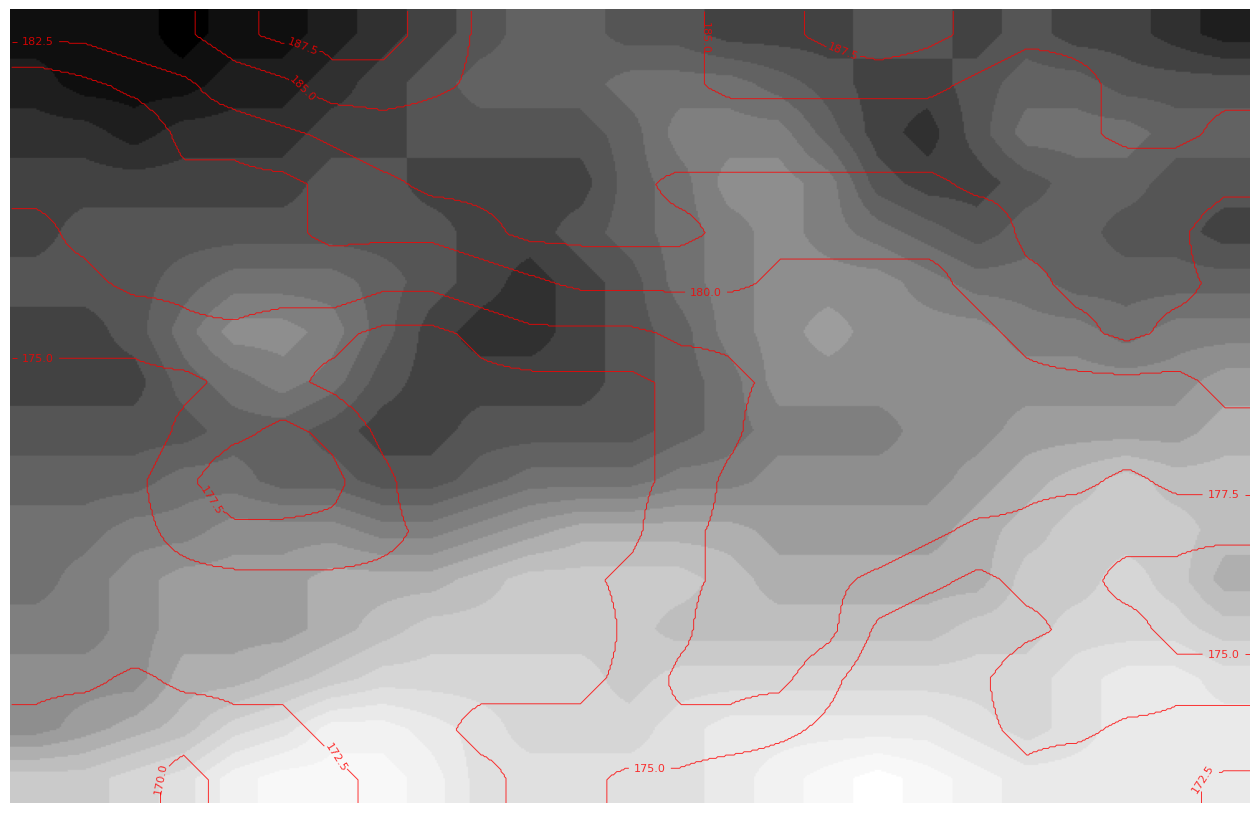

make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.09abc8e7a5444822a968a39b353bdaf7.vrt
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 9.892848321171659 49.800009547468704 9.9069078474618 49.791124171201 SRTM1.09abc8e7a5444822a968a39b353bdaf7.vrt /home/ahmad/personal_ws/src/ROSExamples/script/ROI-DEM.tif
rm -f SRTM1.09abc8e7a5444822a968a39b353bdaf7.vrt
make: Leaving directory '/home/ahmad/.cache/elevation/SRTM1'
make: Entering directory '/home/ahmad/.cache/elevation/SRTM1'
fi

ERROR 1: PROJ: proj_create_from_name: Open of /home/ahmad/anaconda3/envs/debug/share/proj failed
Warning 1: PROJ: proj_create_from_database: Open of /home/ahmad/anaconda3/envs/debug/share/proj failed


In [2]:
import osm

# utm = osm.UTM(49.7955670752582, 9.89987744122153, 32, 'U')
# utm.get_utm(49.7955670752582, 9.89987744122153, output_local=True)
# utm.get_latlng(0, 0, local_input=True)
# utm.get_bbox(100)

dem = osm.DEM(roi=(49.7955670752582, 9.89987744122153), size=250)
dem.show_dem2()
# dem.get_altitude(49.7955670752582, 9.89987744122153)
# dem.get_altitudes()

op = osm.Overpass()
buildings, ground, hull = op.getBuildingsFootprints(roi=(49.7955670752582, 9.89987744122153), 
                                                    size=250, 
                                                    default_height=5, 
                                                    upscale_factor=30)


In [5]:
import utm
lat, lng = 40.749377058452176, -73.98543817164533
lat, lng = 9.7955670752582, 9.89987744122153
lat, lng = 49.801376484175385, 9.934727615561737
lat, lng = 50.10734093879837, 8.664355845621168
print(utm.latitude_to_zone_letter(lat))
print(utm.latlon_to_zone_number(lat, lng))

U
32


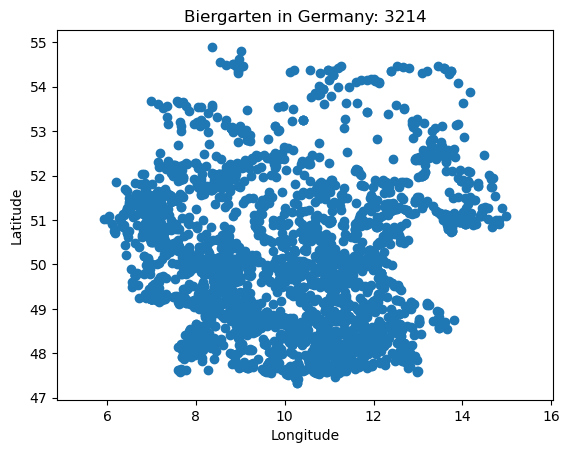

In [6]:
# Example
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title(f'Biergarten in Germany: {len(coords)}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [1]:
import os
import types

import cartopy.io.img_tiles as img_tiles
import requests
import PIL


class CachedTiler(object):
    def __init__(self, tiler):
        self.tiler = tiler

    def __getattr__(self, name):
        # Mimic the tiler interface, but for methods, ensure that the "self"
        # that is passed through continues to be CachedTiler, and not the
        # contained tiler instance.
        attr = getattr(self.tiler, name, None)
        if isinstance(attr, types.MethodType):
            attr = types.MethodType(attr.im_func, self)
        return attr

    def get_image(self, tile):
        tileset_name = '{}'.format(self.tiler.__class__.__name__.lower())
        print(tileset_name)
        cache_dir = os.path.expanduser(os.path.join('~/', 'image_tiles', tileset_name))
        if not os.path.exists(cache_dir):
            os.makedirs(cache_dir)
        tile_fname = os.path.join(cache_dir, '_'.join(str(v) for v in tile) + '.png')
        if not os.path.exists(tile_fname):
            response = requests.get(self._image_url(tile),
                                    stream=True)

            with open(tile_fname, "wb") as fh:
                for chunk in response:
                    fh.write(chunk)
        with open(tile_fname, 'rb') as fh:
            img = PIL.Image.open(fh)
            img = img.convert(self.desired_tile_form)     
        return img, self.tileextent(tile), 'lower'
    
from cartopy.io.img_tiles import Stamen
import matplotlib.pyplot as plt


actual_tiler = Stamen()
tiler = CachedTiler(actual_tiler)

mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-90, -73, 22, 34])
# ax.add_image(tiler, 6)
# ax.coastlines('10m')
# plt.show()

ModuleNotFoundError: No module named 'cartopy'

POLYGON ((8.0368445 50.9651019, 8.0369376 50.9650463, 8.036947 50.9646419, 8.0369464 50.9646384, 8.0369396 50.9646074, 8.037264 50.9623658, 8.0370906 50.9616153, 8.0368438 50.9614599, 8.0365228 50.96128, 8.035747 50.9613964, 8.0340359 50.9608848, 8.0333489 50.9612112, 8.0323709 50.9639974, 8.0322692 50.9640532, 8.0319777 50.9642501, 8.0318391 50.9643517, 8.0317239 50.9644386, 8.0316101 50.9646124, 8.0315403 50.9649359, 8.0319002 50.9651384, 8.0320085 50.9652194, 8.0326539 50.9651771, 8.0337315 50.9651661, 8.0339263 50.9651271, 8.0351936 50.965304, 8.0352872 50.9652651, 8.0363122 50.965059, 8.0368445 50.9651019))


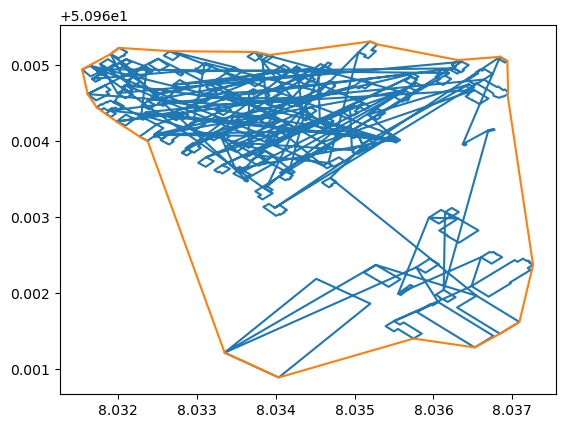

In [55]:
import osm
import shapely.geometry
points_2d = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]
points_3d = [
    (0., 0., 0.), (0., 0., 1.), (0., 1., 0.),
    (1., 0., 0.), (1., 1., 0.), (1., 0., 1.),
    (0., 1., 1.), (1., 1., 1.), (.25, .5, .5),
    (.5, .25, .5), (.5, .5, .25), (.75, .5, .5),
    (.5, .75, .5), (.5, .5, .75)
]
pts = []
with open('boundary.txt', 'r') as f:
    for line in f:
        pts.append([float(item) for item in line.rstrip().split(',')])

pg = osm.alpha.alphashape(pts, 1000)
print(pg)
plt.plot(*shapely.geometry.Polygon(pts).exterior.xy)
plt.plot(*pg.exterior.xy)

# print(osm.alpha.alphashape(points_2d, 2))
# osm.alpha.alphashape(points_3d, 2).show()
# osm.alpha.alphashape(points_3d, 2)